# Семинар 1: введение в Tensorflow

Фрэймворком для обучения нейросеток на нашем курсе будет Tensorflow. Чтобы установить библиотеку, отправляйтесь в консоль и пропишите 

```
pip install tensorflow 
```

Мы будем использовать вторую версию. Если вы до этого сидели на старой версии tensorflow, на всякий случай снесите её. Иначе при установке могут возникнуть какие-нибудь несовместимости и ошибки.

In [1]:
!pip install tensorflow

/bin/bash: pip: command not found


In [1]:
import numpy as np
np.__version__

'1.22.3'

In [2]:
import tensorflow as tf
tf.__version__ 

'2.9.1'

In [35]:
import matplotlib.pyplot as plt

# 0. Tensoflow teaser

Давайте реализуем на `numpy` и на `tensorflow` функцию для поиска суммы квадратов первых $N$ чисел и посмотрим насколько быстро эти функции работают.

In [3]:
np.sum(np.arange(10)**2)

285

In [4]:
def np_sum_squares(N):
    return np.sum(np.arange(N)**2)

In [5]:
%%timeit
N = 10**8
np_sum_squares(N)

696 ms ± 70 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tensorflow из-за того, что мы сначала задаём структуру вычислений, а после осуществляем их, работает быстрее.

In [6]:
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [7]:
%%timeit
N = 10**8
tf_sum_squares(N)

879 ms ± 71.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Более того, когда вы уже задали свой граф вычислений и убедились, что всё работает, можно вызвать декоратор `tf.function`. [Он сделает работу заданного графа](https://www.tensorflow.org/tutorials/customization/performance) более оптимальной и ещё сильнее ускорит код. 

In [8]:
@tf.function
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [9]:
%%timeit
N = 10**8
tf_sum_squares(N)

The slowest run took 36.58 times longer than the fastest. This could mean that an intermediate result is being cached.
4.49 ms ± 8.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Если сравнивать время, то мы видим значительный прогресс в скорости вычислений даже для простой задачи. Данный прирост будет значительно большим для тяжелых рассчетов.

# 1. Тензоры и базовые операции над ними

Основной объект в tensorflow - это **тензор.** Или многомерный массив чисел. Чтобы не нужно было учить кучу новых команд, tensorflow косплеит numpy. 

```
    np.zeros -> tf.zeros
    np.sin -> tf.sin
    np.mean -> tf.reduce_mean
    np.arange -> tf.range
    np.cumsum -> tf.cumsum
```

Правда говоря, не совсем косплеит. Но чаще всего оказываетс довольно близок.

In [10]:
# можно задать тензор из нулей
tf.zeros([3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [11]:
# или из единиц, но уже более сложной размерности
tf.ones([3, 4, 2])

<tf.Tensor: shape=(3, 4, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)>

In [12]:
# можно сгенерировать тензор из нормального распределения
tf.random.normal([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.5154415 ,  0.49693212],
       [-0.08488833,  1.1434964 ]], dtype=float32)>

In [13]:
# можно просто сделать залифку тензора какими-то числами
tf.fill([2, 2], 0.5)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5, 0.5],
       [0.5, 0.5]], dtype=float32)>

In [14]:
# можно создать матрицу в numpy
x = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1]])
x

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

In [15]:
# а потом перевести её в тензор
tf.convert_to_tensor(x, tf.float32) 

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [4., 3., 2., 1.]], dtype=float32)>

In [16]:
# или можно просто сразу создать тензор 
tf.constant([[1,  2,  3,  4],
             [5,  6,  7,  8],
             [9, 10, 11, 12]])

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])>

In [17]:
# наверное, стоит уточнить тип данных в тензоре
x = tf.constant([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]], dtype=tf.float32)

Все срезы, операции, размерности работают как в numpy.

In [18]:
x.dtype

tf.float32

In [19]:
x.shape

TensorShape([3, 4])

In [20]:
x[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [21]:
x[:,1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 2.,  6., 10.], dtype=float32)>

In [22]:
x + 10

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[11., 12., 13., 14.],
       [15., 16., 17., 18.],
       [19., 20., 21., 22.]], dtype=float32)>

In [23]:
x[x > 3]

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.], dtype=float32)>

In [24]:
y = tf.constant([[12, 11, 10, 9],
                  [8, 7, 6, 5],
                  [4, 3, 2, 1]], dtype=tf.float32)

In [25]:
x + y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[13., 13., 13., 13.],
       [13., 13., 13., 13.],
       [13., 13., 13., 13.]], dtype=float32)>

In [26]:
x**y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1.00000e+00, 2.04800e+03, 5.90490e+04, 2.62144e+05],
       [3.90625e+05, 2.79936e+05, 1.17649e+05, 3.27680e+04],
       [6.56100e+03, 1.00000e+03, 1.21000e+02, 1.20000e+01]],
      dtype=float32)>

In [27]:
tf.math.exp(x)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[2.7182817e+00, 7.3890562e+00, 2.0085537e+01, 5.4598148e+01],
       [1.4841316e+02, 4.0342877e+02, 1.0966332e+03, 2.9809580e+03],
       [8.1030835e+03, 2.2026465e+04, 5.9874141e+04, 1.6275478e+05]],
      dtype=float32)>

In [28]:
# Когда надоело работать с тензором, можно вернуться назад в numpy формат
x.numpy() 

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32)

In [29]:
# тип у тензоров может быть разный, но всегда один
tf.constant("hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

### Задание 1:

Попробуйте реализовать на tensorflow сигмоиду. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

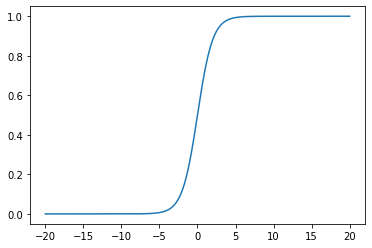

In [36]:
# ващ код  ¯\_(⊙︿⊙)_/¯
x = tf.linspace(-20, 20, 1000)

@tf.function
def sigm(x):
    return 1/(1+tf.math.exp(-x))

y = sigm(x)

plt.plot(x, y);

### Задание 2:

Попробуйте реализовать на tensorflow среднюю квадратичную ошибку. 

$$ 
MSE(\hat y, y) = \sum_{i=1}^n (\hat y - y)^2
$$

In [37]:
# ваш код  ¯\_(⊙︿⊙)_/¯
y_pred = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
y_test = np.array([-1, 3, 4, 6, -5])

y_test = tf.convert_to_tensor(y_test, tf.float32) 

@tf.function
def MSE(y_,  y):
    return tf.reduce_mean(tf.pow(y_ - y, 2))

z = MSE(y_test, y_pred)
z

<tf.Tensor: shape=(), dtype=float32, numpy=22.0>

------------------------------------------

# 2. Производные да градиенты

Тензорфлоу может вычислять производные и градиенты автоматически. Для этого используется [`GradientTape.`](https://www.tensorflow.org/tutorials/customization/autodiff)

Он проходит по всем операциям, которые фигурируют в графе, и применяет к ним chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Мы можем посчитать производную по любому тензору, участвующему в вычислениях.

In [38]:
x = tf.constant([0.3, 1])

# опция persistent=True позволяет искать производную много раз, а не один
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = y**2

In [39]:
t.gradient(z, x)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6, 2.6], dtype=float32)>

In [40]:
t.gradient(z, y)

<tf.Tensor: shape=(), dtype=float32, numpy=2.6>

Нарисуем функцию и её производную на картинке :) 

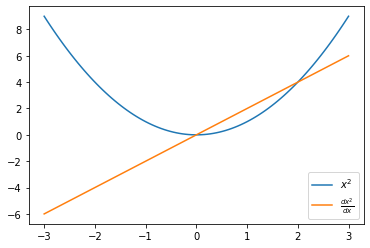

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

x = tf.linspace(-3., 3., 100)

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x**2

dy_dx = t.gradient(y, x)

plt.plot(x, y, label="$x^2$")
plt.plot(x, dy_dx, label=r"$\frac{dx^2}{dx}$")
plt.legend();

### Задание 3:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`

In [42]:
# ваш код  ¯\_(⊙︿⊙)_/¯
def f(w):
    return tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))

w = tf.constant([[5,10], [1,2]], dtype=tf.float32)

with tf.GradientTape(persistent=True) as t:
    t.watch(w)
    f_w = f(w)

df_dw = t.gradient(f_w, w)
df_dw

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)>

# 3. Переменные

Следущий важный объект в tensorflow это **переменная.** Она представляет из себя некоторый буфер в памяти, который содержит текущие тензоры. 

* Переменную можно вставить в любое место графа 
* Переменные можно использовать, чтобы описать какую-то трансформацию
* В процессе расчётов их можно изменять
* Обычно их используют для описания параметров модели

In [43]:
w = tf.Variable(initial_value=0.5)
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>

In [44]:
x = np.array([1,2,3], dtype=float)
x

array([1., 2., 3.])

In [45]:
x*w

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5, 1. , 1.5], dtype=float32)>

Более того, переменные хороши тем, что Tensorflow сразу же следит за ними при вычислении производных. Ему не надо указывать с помощью команды `watch`, за каким тензором нужно приглядывать. 

### Задание 4:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`. Отличие от предыдущей задачки такое: надо задать $w$ не как тензор, а как переменную. 

In [46]:
# ваш код  ¯\_(⊙︿⊙)_/¯
def f(w):
    return tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))

w = tf.Variable(initial_value=[[5,10], [1,2]], dtype=tf.float32)

with tf.GradientTape(persistent=True) as t:
    f_w = f(w)

df_dw = t.gradient(f_w, w)
df_dw

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)>

------------------------------------------

# 4. Оптимизация

Итак, tf умеет искать производные, осталось научиться применять его для оптимизации. 

Попробуем решить глупую задачку по конвертации градусов по цельсию в градусы по фаренгейту. По данным будем пытаться восстановить формулу: 

$$ f = c \times 1.8 + 32 $$

In [47]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype='float32')
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype='float32')

for i,c in enumerate(celsius):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [48]:
# параметры модели 
a = tf.Variable(tf.random.normal([1]), name='bias')
b = tf.Variable(tf.random.normal([1]), name='k')

a.numpy(), b.numpy()

(array([-1.3813756], dtype=float32), array([0.42732242], dtype=float32))

In [49]:
a,  b

(<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-1.3813756], dtype=float32)>,
 <tf.Variable 'k:0' shape=(1,) dtype=float32, numpy=array([0.42732242], dtype=float32)>)

In [50]:
# Наша модель
def linear_regression(x):
    return a + b*x

# Ошибка для модели
def mean_square(y_pred, y_true):
    return tf.reduce_mean((y_pred-y_true)**2)

In [51]:
linear_regression(celsius).numpy()

array([-18.474274 ,  -5.6546   ,  -1.3813756,   2.0372038,   5.0284605,
         8.019718 ,  14.856877 ], dtype=float32)

In [52]:
mean_square(linear_regression(celsius), fahrenheit).numpy()

2593.2083

In [53]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# процесс оптимизации
def model_train(X, Y):

    # находим loss и пробрасываем градиент
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))

In [54]:
# Обучение
epochs = 2000 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        y_pred = linear_regression(celsius)
        loss_val = mean_square(y_pred, fahrenheit)
        print("step: %i, loss: %f, a: %f, b: %f" % (i, loss_val, a.numpy(), b.numpy()))

step: 0, loss: 1083.802490, a: -1.301785, b: 2.275541
step: 100, loss: 723.118835, a: 4.512389, b: 2.029525
step: 200, loss: 492.335022, a: 9.311145, b: 1.989026
step: 300, loss: 335.212463, a: 13.270688, b: 1.955611
step: 400, loss: 228.239914, a: 16.537786, b: 1.928039
step: 500, loss: 155.410751, a: 19.233532, b: 1.905288
step: 600, loss: 105.827202, a: 21.457836, b: 1.886517
step: 700, loss: 72.069557, a: 23.293156, b: 1.871028
step: 800, loss: 49.086620, a: 24.807516, b: 1.858248
step: 900, loss: 33.439384, a: 26.057039, b: 1.847703
step: 1000, loss: 22.786285, a: 27.088057, b: 1.839002
step: 1100, loss: 15.533463, a: 27.938765, b: 1.831822
step: 1200, loss: 10.595653, a: 28.640696, b: 1.825899
step: 1300, loss: 7.233815, a: 29.219881, b: 1.821011
step: 1400, loss: 4.945065, a: 29.697767, b: 1.816978
step: 1500, loss: 3.386837, a: 30.092079, b: 1.813650
step: 1600, loss: 2.325917, a: 30.417448, b: 1.810904
step: 1700, loss: 1.603635, a: 30.685911, b: 1.808638
step: 1800, loss: 1.1

Можно сделать то же самое, но с визуализацией. 

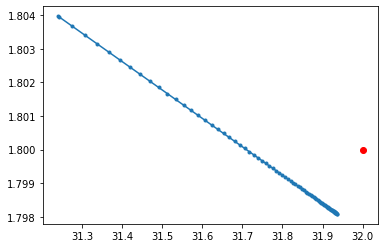

In [55]:
from IPython.display import clear_output

epochs = 2000 # число эпох 

ass = [a.numpy()[0]] # стартовые точки 
bss = [b.numpy()[0]] 

for i in range(epochs):
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    if i%25 == 0:
        # Пополняем запас точек 
        ass.append(a.numpy()[0])
        bss.append(b.numpy()[0])

        clear_output(True) # чтобы всё на одной картинке рисовалось, а не на милионе
        plt.plot(ass, bss, marker='.')
        plt.scatter(32, 1.8, c='red')
        plt.show()

### Задание 5:

Реализуйте для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

процедуру градиентного спуска. Каким получилось минимальное значение? 

In [56]:
# ваш код  ¯\_(⊙︿⊙)_/¯
@tf.function
def f(w):
    return tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))

w = tf.Variable(initial_value=[[5,10], [1,2]], dtype=tf.float32)

# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.1)

# процесс оптимизации
def model_train():
    with tf.GradientTape() as g:
        loss = f(w)

    gradients = g.gradient(loss, [w])
    optimizer.apply_gradients(zip(gradients, [w]))

epochs = 500 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train()
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        loss_val = f(w)
        print("step: %i, val: %f" % (i, loss_val))

step: 0, val: 0.545920
step: 100, val: 0.507229
step: 200, val: 0.466161
step: 300, val: 0.421906
step: 400, val: 0.373022


In [57]:
w

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.1303997 ,  9.550416  ],
       [-1.7050806 ,  0.25506625]], dtype=float32)>

------------------------------------------

# 5. Моя первая нейросеть 

Для того, чтобы разобраться как обучать нейросити, нужно освоить три вещи: 

1. Как обрабатывать поток данных и пихать его в сетку
2. Как сделать сетку
3. Как написать цикл обучения

Раньше все учили свою первую нейросеть на [наборе рукопистных цифр MNIST.](http://yann.lecun.com/exdb/mnist/) Теперь это не модно. Если где-то кто-то будет проводить у вас семинар с участием этого датасета, так и скажите ему: __это не модно!__  Хлопать дверью или нет --- на ваше усмотрение. 

На арене туториалов новый король: [Fashion MNIST.](https://www.tensorflow.org/tutorials/keras/classification) По ссылке лежит туториал с строительством нейросетки на этом наборе, но с участием Keras. Мы пока что обойдёмся без него.


### 5.0 Данные

In [64]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [65]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [66]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Нарисуем несколько рандомных картинок из тренировочной выборки. 

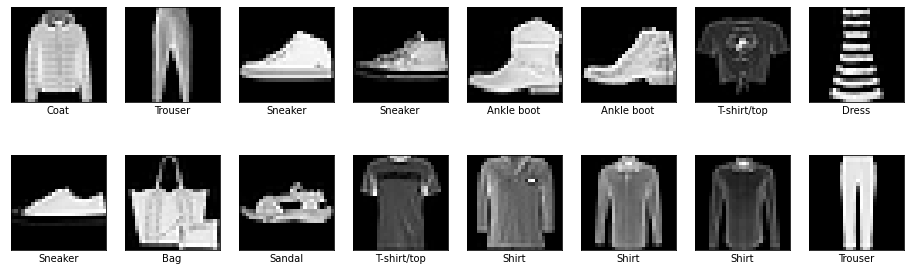

In [67]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[random_index, :], cmap = 'gray')
        ax.set_xlabel(class_names[y_train[random_index]])
plt.show()

Каждая картинка это матрица из чисел. Если число большое - пиксель яркий. Если маленькое - тёмный. Яркость измеряется по шкале от $0$ до $255$.

In [68]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Картинка - матрица. 

In [69]:
X_train[0].shape

(28, 28)

Давайте отнормируем выборку. 

In [70]:
X_train = X_train/127.5 - 1
X_test = X_test/127.5 - 1

Будем прогнозировать тип картинки по её пикселям. Давайте растянем её в вектор из $28 \times 28$ фичей.

In [71]:
X_train = X_train.reshape(X_train.shape[0], 28**2)
X_test = X_test.reshape(X_test.shape[0], 28**2)
X_train.shape

(60000, 784)

Поставим для данных тип, чтобы ничего не поломалось.

In [72]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## 5.1 Обработка потока данных

Чтобы в tensorflow эффективно итерироваться по данным и применять к ним различные преобразования, о которых вы узнает позже - нужно [создать из них `Dataset`](https://www.tensorflow.org/guide/data?hl=ur)

In [73]:
x = [8, 3, 0, 8, 2, 1]

dataset = tf.data.Dataset.from_tensor_slices(x)
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

`Dataset` это итератор. Когда мы будем работать с большими данными, мы будем писать на его основе итераторы, которые будут считывать данные прямо с компьютера и после использования выкидывать их из оперативной памяти.

In [74]:
it = range(5)
for i in it:
    print(i)

0
1
2
3
4


In [75]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


У датасетов есть много интересных методов. Например, в них можно перемешивать данные и разбивать их на батчи. 

In [76]:
x = [8, 3, 0, 8, 2, 1]
y = [1, 0, 1, 1, 0, 1]

# создали объект с данными для обучения 
dataset = tf.data.Dataset.from_tensor_slices((x, y))

# перемешали данные с окном в 10 и сделали кучу батчей размера 2 
dataset = dataset.shuffle(10).batch(2)

In [77]:
for item,jtem in dataset:
    print(item.numpy(),jtem.numpy())

[0 8] [1 1]
[3 1] [0 1]
[2 8] [0 1]


Для первого раза этих двух преобразований нам будет достаточно.

### Задание 6:

Напишите итератор для тренировочной и тестовой выборок. Попробуйте проитерироваться по нескольким его первым объектам с помощью цикла. 

In [78]:
# ваш код  ¯\_(⊙︿⊙)_/¯
ds_tr = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_ts = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_ds = ds_tr.shuffle(10000).batch(256)
test_ds = ds_ts.batch(256)

In [81]:
for x_c, y_c in test_ds:
    print(x_c.shape, y_c.shape)

(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(256, 784) (256,)
(16, 784) (16,)


## 5.2 Нейронная сеть

Собирать нейронную сеть в tensorflow можно разными способами. Давайте посмотрим на три разных.

__Способ 1:__ для того, чтобы в hight-level tensorflow создавать нейросети, обычно используют класс `Model`. Например, это можно сделать следующим образом.

In [82]:
from tensorflow.keras import Model, layers

# Объявляем как должна будет выглядеть модель
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = layers.Dense(64, activation='relu')
        self.d2 = layers.Dense(32, activation='relu')
        self.d3 = layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

# создаём один экземпляр модели
model = MyModel()
model

In [83]:
model(X_train[:3]) # получили предсказания модели

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.03367734, 0.07182798, 0.09104855, 0.09707695, 0.09686592,
        0.06826865, 0.35441065, 0.03643569, 0.04215566, 0.10823263],
       [0.02975878, 0.07203521, 0.07868998, 0.05333285, 0.2106053 ,
        0.07100695, 0.28139952, 0.0279547 , 0.11714255, 0.05807417],
       [0.05969226, 0.09515817, 0.0805354 , 0.11560807, 0.1513449 ,
        0.10984515, 0.17439759, 0.06596316, 0.048804  , 0.09865125]],
      dtype=float32)>

Как мы видим на данном примере, у данного класса должно быть метод `call`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `keras.layers` содержит в себе реализацию большинства слоев.

Если вы не очень поняли, что произошло, не пугайтесь. На следующем семинаре мы более подробно поговорим про объектно-ориентированное программирование и научимся писать подобные модели. 

__Способ 2:__ Можно собрать модель с помощью класса `Sequential`. В его рамках сбор модели будет выглядить как строительство башни из конструктора LEGO. Модель описывается последовательно. Мы как бы создаём коробочку `model` и постепенно добавляем туда детальки нашей сетки. 

In [84]:
from tensorflow.keras import Sequential, layers

model = Sequential()                             # создали контейнер для модели
model.add(layers.Dense(64))                      # слой из 64 нейронов
model.add(layers.Activation('relu'))             # функция активации
model.add(layers.Dropout(0.5))                   # дропаут с вероятностью 0.5 
model.add(layers.Dense(10))                      # выход из сетки
model.add(layers.Activation('softmax'))

In [85]:
model(X_train[:3]) # получили предсказания модели

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.06710178, 0.05850609, 0.03088893, 0.02262748, 0.40024436,
        0.13904448, 0.05648514, 0.16448136, 0.01881317, 0.04180718],
       [0.05290145, 0.08403568, 0.02771225, 0.08186394, 0.3124479 ,
        0.06761827, 0.10819066, 0.06829237, 0.06657333, 0.13036409],
       [0.02659197, 0.02219312, 0.0140322 , 0.09533639, 0.25667003,
        0.09218556, 0.10017461, 0.13702099, 0.03134096, 0.22445416]],
      dtype=float32)>

__Способ 3:__ Описать модель функционально, в явном виде прописав какие аргументы идут на вход какому слою. 

In [86]:
a = layers.Input(shape=(X_train.shape[1],))  # Первая заглушка для входа 
b = layers.Dense(64)(a)                      # Применяем ко входу полносвязный слой как функцию
b = layers.Activation('relu')(b)             # Теперь к тому, что получилось функцию активации
b = layers.Dropout(0.5)(b)                   # Ну и так далее... 
b = layers.Dense(10, activation='relu')(b)   # Функции активации можно звать по-разному

model = Model(inputs=a, outputs=b)    # указываем что вход, а что выход, склеивая модель

In [87]:
model(X_train[:3]) # получили предсказания модели

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.46562976, 0.7915678 , 1.0172751 , 1.8099083 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.0763706 , 0.        , 0.        , 1.1482259 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.0155681 , 1.3175002 , 1.0639719 , 0.        ,
        0.12213417, 0.05639993, 0.        , 0.        , 0.        ]],
      dtype=float32)>

### Задание 7:

Способом, который вам больше всего понравился, напишите нейросеть из трёх полносвязных слоёв размеров $128, 64, 32$ с сигмоидой в качестве функции активации. После каждого слоя сделайте дропаут с вероятностью $0.2$. Выходной слой должен состоять из $10$ нейронов с `Softmax` в качестве функции активации, так как мы решаем задачу классификации $10$ классов. 

In [92]:
# ваш код  ¯\_(⊙︿⊙)_/¯
class SuperPuperModel(Model):
    def __init__(self):
        super().__init__()
        self.d1 = layers.Dense(128, activation='sigmoid', name='Jura')
        self.d2 = layers.Dense(64, activation='sigmoid')
        self.d3 = layers.Dense(32, activation='sigmoid')
        self.out = layers.Dense(10, activation='softmax')
        self.dropout = layers.Dropout(0.2)
    
    def call(self, x):
        z = self.d1(x)
        z = self.dropout(z)
        z = self.d2(z)
        z = self.dropout(z)
        z = tf.concat([x,z], axis=1)
        z = self.d3(z)
        z = self.dropout(z)
        z = self.out(z)
        
        return z

# создаём один экземпляр модели
model = SuperPuperModel()
model

In [93]:
model(X_train[:3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.1110491 , 0.10218819, 0.19046183, 0.05340027, 0.0500373 ,
        0.11549047, 0.08752629, 0.10005013, 0.05300353, 0.1367929 ],
       [0.08406209, 0.079459  , 0.18742576, 0.10085335, 0.05547392,
        0.07069927, 0.10398582, 0.07252267, 0.0550114 , 0.19050664],
       [0.08559509, 0.09640107, 0.19426435, 0.07587939, 0.05176687,
        0.13474399, 0.08552569, 0.10410523, 0.05251728, 0.11920104]],
      dtype=float32)>

## 5.3 функция потерь и цикл для обучения

Посмотрим сколько параметров нам предстоит оценить. 

In [94]:
model.summary()

Model: "super_puper_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Jura (Dense)                multiple                  100480    
                                                                 
 dense_11 (Dense)            multiple                  8256      
                                                                 
 dense_12 (Dense)            multiple                  27168     
                                                                 
 dense_13 (Dense)            multiple                  330       
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
Total params: 136,234
Trainable params: 136,234
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Список из весов модели (хранятся как матрицы)
len(model.trainable_variables)

8

Подгрузим какой-нибудь оптимизатор, который будет делать для нас градиентный спуск. 

In [97]:
learning_rate = 1e-4
optimizer = tf.optimizers.Adam(learning_rate)

Подгрузим из пакета функцию потерь. Её можно было бы написать самостоятельно по аналогии с тем, как мы это сделали для градусов по фарингейту.

In [98]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.


In [99]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

### Задание 8: 

Напишите функцию, которая делает один шаг обучения модели. 

In [106]:
@tf.function
def train_step(images, labels):
    
    # находим loss и пробрасываем градиент
    with tf.GradientTape() as t:
        
        # ваш код  ¯\_(⊙︿⊙)_/¯
        y_hat = model(images)
        loss = loss_function(labels, y_hat)
        
     
    # Вычисляем градиенты и обновляем веса
    grad = t.gradient(loss, model.trainable_variables)
    # Тут тоже ваш код  ¯\_(⊙︿⊙)_/¯
    optimizer.apply_gradients(zip(grad, model.trainable_variables))
    # запоминаем получившееся значение loss
    train_loss(loss)

Напишем функцию, которая будет делать один шаг тестирования модели. 

In [107]:
@tf.function
def test_step(images, labels):
    predictions = model(images, training=False)
    loss = loss_function(labels, predictions)
    test_loss(loss)

In [110]:
# Работает ли?
train_step(X_train, y_train)

In [111]:
train_loss.result()

<tf.Tensor: shape=(), dtype=float32, numpy=2.3652334>

Запускаем обучение.

In [113]:
EPOCHS = 5

for epoch in range(EPOCHS):
    # Сброс метрик перед стартом новой эпохи
    train_loss.reset_states()
    test_loss.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Test Loss: {test_loss.result()}, '
    )

Epoch 1, Loss: 1.7149208784103394, Test Loss: 1.391190528869629, 
Epoch 2, Loss: 1.2415701150894165, Test Loss: 1.137999176979065, 
Epoch 3, Loss: 1.0489205121994019, Test Loss: 0.9902216196060181, 
Epoch 4, Loss: 0.9256545901298523, Test Loss: 0.8871461153030396, 
Epoch 5, Loss: 0.8360371589660645, Test Loss: 0.8103511929512024, 


### Задание 9: 

С помощью `tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')` добавьте в обучение отслеживание точности модели на тестовой и тренировочной выборках.  

## 5.4 метод .fit

Можно обучать модели намного проще. Это позволяет сделать метод  `fit` позволяет сделать это. Он принимает на вход обучающую выборку `X_train, y_train`. Параметр  `batch_size` это  размер батча. Этот параметр ограничивает количество примеров, которое за раз подаётся в нашу нейронную сеть. Количиство эпох для обучения, `epochs` - это число проходов модели по обучающей выборке. 

Обычно нейросетки обучаются довольно долго. В связи с этим обучать их на различных фолдах и оценивать качество работы модели на кросс-валидации не очень быстрое занятие, которое себе может позволить далеко не каждый. Для проверки качества обычно внутри обучения с помощью параметра `validation_split` часть выборки оставляют под валидацию, которая осуществляется после каждой эпохи. Как только качество на валидации начнёт падать, это будет означать, что модель переобучилаcь. 

Всё, что будет нам возвращать метод `.fit`, мы запишем в переменную `hist`. После обученя модели там окажется вся история ошибок на каждом шаге обучения. Отключить сообщения о том, на каком этапе обучения в данный момент находится модель, можно с параметром `verbose = 0`. Переменную $y$ для успешного обучения сетки нужно будет перевести в матрицу из дамми-переменных с помощью команды `to_categorical`. 

In [114]:
from tensorflow.keras import Sequential, layers

model = Sequential()                             # создали контейнер для модели
model.add(layers.Dense(64))                      # слой из 64 нейронов
model.add(layers.Activation('relu'))             # функция активации
model.add(layers.Dropout(0.5))                   # дропаут с вероятностью 0.5 
model.add(layers.Dense(10))                      # выход из сетки
model.add(layers.Activation('softmax'))

learning_rate = 1e-4
optimizer = tf.optimizers.Adam(learning_rate)

loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(loss = loss_function, 
              metrics=["accuracy"], 
              optimizer=optimizer)

Обучаем модель через `.fit`.

In [115]:
hist = model.fit(X_train, 
                 y_train,
                 validation_split=0.2,
                 epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.0582 - accuracy: 0.6336 - val_loss: 0.5865 - val_accuracy: 0.7965
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7013 - accuracy: 0.7589 - val_loss: 0.5019 - val_accuracy: 0.8214
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6122 - accuracy: 0.7858 - val_loss: 0.4595 - val_accuracy: 0.8332
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5715 - accuracy: 0.8009 - val_loss: 0.4450 - val_accuracy: 0.8361
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5404 - accuracy: 0.8125 - val_loss: 0.4282 - val_accuracy: 0.8416
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5193 - accuracy: 0.8189 - val_loss: 0.4161 - val_accuracy: 0.8481
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5058 - accuracy: 0.8227 - val_loss: 0.4087 - val_accuracy:

Возвращает этот метод history — это история ошибок на каждом шаге обучения. Посмотрим на динамику ошибок нашей модели во времени. 

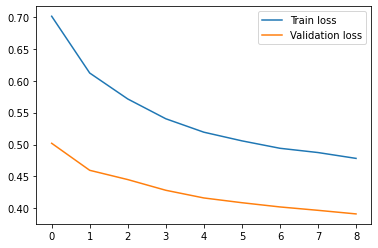

In [116]:
start = 1
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [101]:
# Можно предсказать вероятности для тестовой выборки
model.predict_proba(X_test)

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[1.3156740e-05, 2.4121773e-06, 1.4399477e-05, ..., 1.3076741e-01,
        3.6488517e-04, 7.8232443e-01],
       [9.9224606e-05, 3.6931475e-08, 9.6212244e-01, ..., 2.4948422e-11,
        1.3955003e-05, 7.2877859e-10],
       [6.7426367e-06, 9.9998486e-01, 6.5050887e-07, ..., 1.0465291e-11,
        1.9565973e-09, 2.5397479e-10],
       ...,
       [1.9883195e-02, 1.3330028e-05, 1.5924526e-03, ..., 4.4957025e-05,
        9.6116906e-01, 2.9142807e-06],
       [3.1884199e-05, 9.9689507e-01, 3.3740911e-05, ..., 3.0009915e-08,
        6.5518464e-07, 1.8049963e-07],
       [8.1025901e-05, 2.3880642e-05, 2.7011210e-04, ..., 1.3314620e-01,
        6.6031152e-03, 1.0581925e-02]], dtype=float32)

In [102]:
# А можно классы 
model.predict_classes(X_test)

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, ..., 8, 1, 5])

In [103]:
# Можно найти logloss 
loss_function(y_test,model.predict_proba(X_test))

<tf.Tensor: shape=(), dtype=float32, numpy=0.4332375>

In [104]:
# Можно посмотреть на качество модели по всем указанным при коммпиляции метрикам. 
score = model.evaluate(X_test, y_test, verbose=0)
score 

[0.43323734402656555, 0.8440999984741211]

Этот способ учить модели более простой, но менее универсальный. В будущем мы увидим довольно много ограничений, которые на нас накладывает такой подход.

# N+1. Как Tensorflow работал раньше 

Больше такой код не надо писать никогда и нигде. Если видите его в туториалах в интернете, сразу закрывайте их. Эти туториалы устарели. Можете попробовать подуть на них (сдуть слой пыли), а дальше попробовать самостоятельно переписать старый код на новый. Это неплохое упражнение :) 

In [ ]:
import tensorflow.compat.v1 as tf  # подгружаем первую версию библиотеки 
tf.disable_v2_behavior()           # отключаем функционал второй 
                                   # теперь код, написанный на версии tf 1.x должен работать 
tf.__version__

Раньше сначала надо было задать структуру вычислений с помощью тензоров. 

In [ ]:
# что происходило в первой версии 
a = tf.constant([1, 2])
b = tf.constant([3, 4])

print(a + b)

Результат на лету было увидеть нельзя. 

In [ ]:
c = a + b
с

Если хотелось результата, надо было запускать вычислительную сессию, которая прогоняла все данные через граф.

In [ ]:
# открываем вычислительную сессию 
with tf.Session() as sess:
    print(sess.run(с))

In [ ]:
# либо можно было открыть глобальную сессию 
sess = tf.InteractiveSession()
c.eval()

Процедура обучения модели выглядела раньше иначе. Кроме переменных в обучении участие принимал ещё один объект, `placeholder`. 

* __placeholder__ — место в графе, которое может принимать входные параметры в граф извне. В эти места мы будем вставлять наши данные

In [ ]:
epochs = 10

# плейсхолдеры для данных 
# "Я обещаю вставить сюда x и y позже"
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# параметры модели 
a = tf.Variable(tf.zeros([1]), name='bias')
b = tf.Variable(tf.zeros([1]), name='k')

# модель 
y_hat = b*x + a

# функция потерь и метод оптимизации
loss = tf.sqrt(tf.reduce_sum((y - y_hat)**2))
opt = tf.train.AdamOptimizer(learning_rate = 0.1)

# из-за того, что не было динамических вычислений, 
# было проще с градиентами
step = opt.minimize(loss)

# Но зато было сложнее с процедурой обучения, надо было запускать ... сессии
# открываем вычислительную сессию 
with tf.Session() as sess:
    
    # инициализировали все переменные 
    tf.global_variables_initializer().run() 
    
    for i in range(epochs):
        
        # Дорогая сессия, вычисли мне результат функции потерь, пожалуйста! Вот тебе конкретные x и y! 
        cur_loss = sess.run(loss, feed_dict={x:celsius, y:fahrenheit})
        print('Текущие потери:', cur_loss)
        
        # шаг оптимизации 
        sess.run(step, feed_dict={x:celsius, y:fahrenheit})
        
    print('\nКоэффициенты:', a.eval()[0], b.eval()[0])
    print('Прогнозы:', sess.run(y_hat, feed_dict={x:[-40,0,38]}))

## Почиташки

* [Эффективный tensorflow 2.0](https://www.tensorflow.org/guide/effective_tf2)
* [Простые примеры кода на tensorflow 2.0](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/tensorflow_v2)
* [Очень-очень милая презентация про fashion mnist](https://github.com/fbchow/fashion-mnist-tensorflow/blob/master/ml-fashion-mnist-presentation.pdf)


__Немного старья:__

* [Введение в старую версию Tensorflow на Хабре](https://habrahabr.ru/company/ods/blog/324898/)
* [Введение в старый Tensorflow от ШАД,](https://nbviewer.jupyter.org/github/yandexdataschool/Practical_DL/blob/fall18/week02_autodiff/seminar_tensorflow.ipynb) моя тетрадка частично основана на этой тетрадке, хоть сходство на первый взгляд и не заметно. 
* [Неплохая подборка разных тетрадок](https://github.com/Hvass-Labs/TensorFlow-Tutorials) на разном tensorflow